Optimization

In [1]:
# Import Dependencies and Read Data:
import pandas as pd

# Read into the data
all_homes_df = pd.read_csv("../Resources/housing.csv")

all_homes_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,INLAND,78100
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,INLAND,77100
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,INLAND,92300
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,INLAND,84700


In [2]:
#Display First 10 Rows:
all_homes_df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200
5,-122.25,37.85,52,919,213.0,413,193,4.0368,NEAR BAY,269700
6,-122.25,37.84,52,2535,489.0,1094,514,3.6591,NEAR BAY,299200
7,-122.25,37.84,52,3104,687.0,1157,647,3.1200,NEAR BAY,241400
8,-122.26,37.84,42,2555,665.0,1206,595,2.0804,NEAR BAY,226700
9,-122.25,37.84,52,3549,707.0,1551,714,3.6912,NEAR BAY,261100


In [3]:
# Iterate over each column in the DataFrame to Check for Null Values:
for column in all_homes_df.columns:
    # Print the column name and the count of null values
    print(f"Column {column} has {all_homes_df[column].isnull().sum()} null values")    


Column longitude has 0 null values
Column latitude has 0 null values
Column housing_median_age has 0 null values
Column total_rooms has 0 null values
Column total_bedrooms has 207 null values
Column population has 0 null values
Column households has 0 null values
Column median_income has 0 null values
Column ocean_proximity has 0 null values
Column median_house_value has 0 null values


In [4]:
# Display DataFrame Information:
all_homes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [5]:
# Drop duplicate rows 
all_homes_df.drop_duplicates(inplace=True)


Handling Missing Values:

In [7]:
# Choose a strategy (e.g., fill with median)
columns_with_missing_values = ['total_bedrooms']
median_values = all_homes_df[columns_with_missing_values].median(numeric_only=True)
all_homes_df[columns_with_missing_values] = all_homes_df[columns_with_missing_values].fillna(median_values)

In [8]:
all_homes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.7+ MB


In [9]:
# Display descriptive statistics for numerical columns in the DataFrame
all_homes_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,536.838857,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.391878,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [10]:
#Outlier Removal

In [11]:
#1 Identify Numerical Columns for Outlier Detection:
#2 Check for Outliers Using Z-score:
#3 Remove Outliers:


In [12]:
import pandas as pd
from scipy.stats import zscore


# Specify numerical columns for outlier removal
numerical_columns = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']

# Set the Z-score threshold for outlier removal
zscore_threshold = 3

# Check for outliers using Z-score
z_scores = zscore(all_homes_df[numerical_columns])
abs_z_scores = abs(z_scores)
outliers = (abs_z_scores > zscore_threshold).any(axis=1)

# Remove outliers
all_homes_df_no_outliers = all_homes_df[~outliers]

# Display information about the new DataFrame without outliers
print(all_homes_df_no_outliers.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19746 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           19746 non-null  float64
 1   latitude            19746 non-null  float64
 2   housing_median_age  19746 non-null  int64  
 3   total_rooms         19746 non-null  int64  
 4   total_bedrooms      19746 non-null  float64
 5   population          19746 non-null  int64  
 6   households          19746 non-null  int64  
 7   median_income       19746 non-null  float64
 8   ocean_proximity     19746 non-null  object 
 9   median_house_value  19746 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.7+ MB
None


In [13]:
#Categorical Data Encoding:
#1 Identify Categorical Columns for One-Hot Encoding:
#2 Perform One-Hot Encoding:


In [14]:
import pandas as pd

# Identify categorical columns
categorical_columns = ['ocean_proximity']

# Perform one-hot encoding
all_homes_df_encoded = pd.get_dummies(all_homes_df_no_outliers, columns=categorical_columns)

# Display information about the DataFrame after one-hot encoding
print(all_homes_df_encoded.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19746 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   19746 non-null  float64
 1   latitude                    19746 non-null  float64
 2   housing_median_age          19746 non-null  int64  
 3   total_rooms                 19746 non-null  int64  
 4   total_bedrooms              19746 non-null  float64
 5   population                  19746 non-null  int64  
 6   households                  19746 non-null  int64  
 7   median_income               19746 non-null  float64
 8   median_house_value          19746 non-null  int64  
 9   ocean_proximity_<1H OCEAN   19746 non-null  uint8  
 10  ocean_proximity_INLAND      19746 non-null  uint8  
 11  ocean_proximity_ISLAND      19746 non-null  uint8  
 12  ocean_proximity_NEAR BAY    19746 non-null  uint8  
 13  ocean_proximity_NEAR OCEAN  197

In [15]:
all_homes_df_encoded.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,0,0,0,1,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,0,0,0,1,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,0,0,0,1,0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,0,0,0,1,0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,0,0,0,1,0


In [17]:
#Normalization/Standardization:

In [18]:
from sklearn.preprocessing import StandardScaler

# Option 2: Standardization (Z-score Scaling)
scaler_standard = StandardScaler()
all_homes_df_encoded[numerical_columns] = scaler_standard.fit_transform(all_homes_df_encoded[numerical_columns])

 Data Model Optimization

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0  -1.320408  1.038995            0.964837    -1.053400       -1.258623   
1  -1.315416  1.029669           -0.645916     3.281952        2.118327   
2  -1.325401  1.025006            1.850751    -0.644194       -1.047779   
3  -1.330393  1.025006            1.850751    -0.778737       -0.892239   
4  -1.330393  1.025006            1.850751    -0.532656       -0.736699   

   population  households  median_income  median_house_value  
0   -1.280730   -1.250056       2.872000            2.266531  
1    1.409319    2.531830       2.857142            1.416062  
2   -1.055589   -1.059467       2.205358            1.358219  
3   -0.975366   -0.902511       1.197528            1.260610  
4   -0.966309   -0.753029       0.075698            1.268744  
Iteration 1 - Initial Model: MSE = 0.37640758343021063, R-squared = 0.6290014764944827
Iteration 2 - Hyperparameter Tuning with Grid Search - {'max_depth': 15, 'n_estimato

<Figure size 1000x600 with 0 Axes>

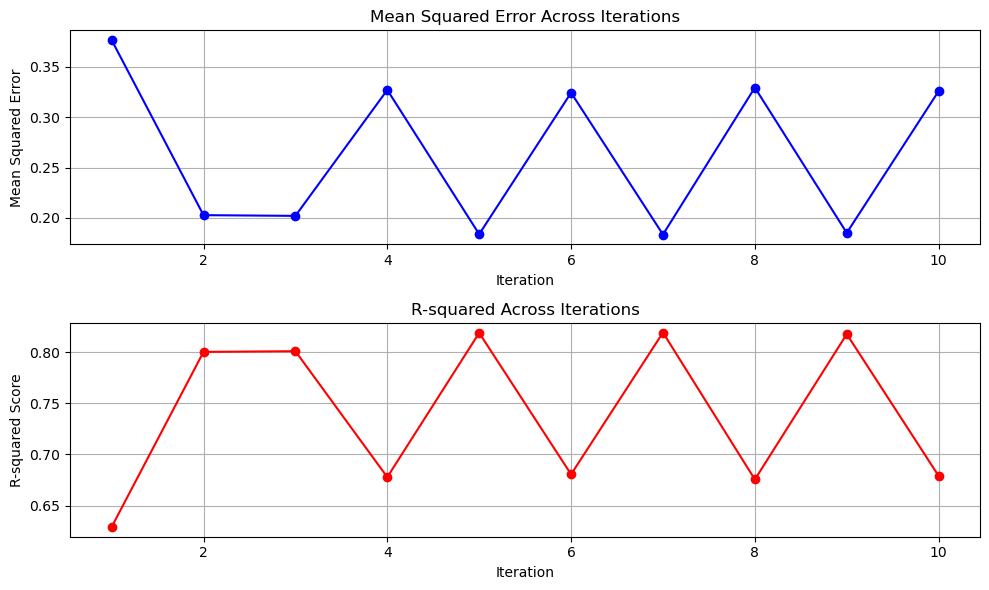

In [19]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sqlalchemy import create_engine
# check and drop columns
#  all_homes_df_encoded is your DataFrame
if all(col in all_homes_df_encoded.columns for col in ['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND', 'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN']):
    # Drop unnecessary columns
    columns_to_drop = ['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
                       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN']
    all_homes_df_encoded = all_homes_df_encoded.drop(columns=columns_to_drop)
else:
    print("Columns to drop not found in the DataFrame.")

# Save the DataFrame to an SQLite database
db_engine = create_engine('sqlite:///homesdb.db')

# Check DataFrame contents
print(all_homes_df_encoded.head())

# Check if DataFrame is empty
if all_homes_df_encoded.empty:
    print("DataFrame is empty. Check preprocessing steps.")
else:
    # Save DataFrame to SQLite database
    all_homes_df_encoded.to_sql('Homesdata', db_engine, if_exists='replace', index=False)

    # Split the dataset into training and testing sets
    X = all_homes_df_encoded.drop('median_house_value', axis=1)
    y = all_homes_df_encoded['median_house_value']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Feature scaling using StandardScaler
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Iterative Model Optimization
    csv_filename = 'model_optimization_log.csv'
    header = ['Iteration', 'Model', 'Parameters Tweaked', 'Changes Made', 'Mean Squared Error', 'R-squared Score']
    with open(csv_filename, 'w', newline='') as csvfile:
        csv_writer = csv.writer(csvfile)
        csv_writer.writerow(header)

    # Lists to store performance metrics for visualization
    mse_values = []
    r2_values = []

    def log_optimization_iteration(iteration, model_name, params_tweaked, changes_made, mse, r2):
        with open(csv_filename, 'a', newline='') as csvfile:
            csv_writer = csv.writer(csvfile)
            csv_writer.writerow([iteration, model_name, params_tweaked, changes_made, mse, r2])

        # Append values to the lists for visualization
        mse_values.append(mse)
        r2_values.append(r2)

    # Model Iterations
    for iteration in range(1, 11):  # Increased to 10 iterations
        if iteration == 1:
            model = LinearRegression()
            params_tweaked = 'Default'
            changes_made = 'Initial Model'
        elif iteration == 2:
            model = RandomForestRegressor()
            param_grid = {'n_estimators': [100, 150, 200], 'max_depth': [5, 10, 15]}
            grid_search = GridSearchCV(model, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
            grid_search.fit(X_train_scaled, y_train)
            model = grid_search.best_estimator_
            params_tweaked = grid_search.best_params_
            changes_made = f'Hyperparameter Tuning with Grid Search - {params_tweaked}'
        elif iteration == 3:
            model = RandomForestRegressor()
            param_dist = {'n_estimators': [100, 150, 200], 'max_depth': [5, 10, 15]}
            random_search = RandomizedSearchCV(model, param_dist, n_iter=5, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
            random_search.fit(X_train_scaled, y_train)
            model = random_search.best_estimator_
            params_tweaked = random_search.best_params_
            changes_made = f'Hyperparameter Tuning with Randomized Search - {params_tweaked}'
        else:
            if iteration % 2 == 0:
                model = DecisionTreeRegressor()
                param_grid = {'max_depth': [5, 10, 15], 'min_samples_split': [2, 5, 10]}
                grid_search = GridSearchCV(model, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
                grid_search.fit(X_train_scaled, y_train)
                model = grid_search.best_estimator_
                params_tweaked = grid_search.best_params_
                changes_made = f'Decision Tree Hyperparameter Tuning - {params_tweaked}'
            else:
                model = GradientBoostingRegressor()
                param_grid = {'n_estimators': [50, 100, 150], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]}
                grid_search = GridSearchCV(model, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
                grid_search.fit(X_train_scaled, y_train)
                model = grid_search.best_estimator_
                params_tweaked = grid_search.best_params_
                changes_made = f'Gradient Boosting Hyperparameter Tuning - {params_tweaked}'

        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        log_optimization_iteration(iteration, model.__class__.__name__, params_tweaked, changes_made, mse, r2)
        print(f"Iteration {iteration} - {changes_made}: MSE = {mse}, R-squared = {r2}")

    overall_performance = pd.read_csv(csv_filename)
    print("\nOverall Model Performance:")
    print(overall_performance.groupby('Model')[['Mean Squared Error', 'R-squared Score']].mean())

    print("Model optimization completed. Results saved to:", csv_filename)

    # Visualize the results
    plt.figure(figsize=(10, 6))

    # Plot MSE
    # Visualize the results
    plt.figure(figsize=(10, 6))

    # Plot MSE
    plt.subplot(2, 1, 1)
    plt.plot(range(1, 11), mse_values, marker='o', linestyle='-', color='b')
    plt.title('Mean Squared Error Across Iterations')
    plt.xlabel('Iteration')
    plt.ylabel('Mean Squared Error')
    plt.grid(True)

    # Plot R-squared
    plt.subplot(2, 1, 2)
    plt.plot(range(1, 11), r2_values, marker='o', linestyle='-', color='r')
    plt.title('R-squared Across Iterations')
    plt.xlabel('Iteration')
    plt.ylabel('R-squared Score')
    plt.grid(True)

    # Adjust layout for better visualization
    plt.tight_layout()

    # Show the plots
    plt.show()